In [372]:
import os
import cv2
import numpy as np
import pandas as pd
import glob
from PIL import Image, ImageFilter
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Meiryo'

In [373]:
image_src = './img'
display(os.path.exists(image_src))
out_dir = 'outimg'
os.makedirs(out_dir, exist_ok=True) 

True

In [374]:
baseimage_fn = './baseimage.jpg'
pBaseImage = Image.open(baseimage_fn)

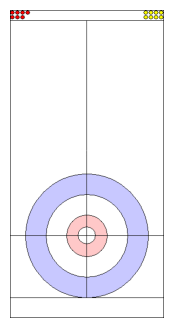

In [375]:
def ShowImage(img):
    fig, ax = plt.subplots(figsize=(3,4))
    ax.imshow(img)
    ax.axis('off')
def ShowGray(img):
    fig, ax = plt.subplots(figsize=(3,4))
    ax.imshow(img,cmap='gray')
    ax.axis('off')
ShowImage(pBaseImage)

In [395]:
g = glob.glob(os.path.join(image_src , '*.png'))
fn = g[0]
fn = g[-1]
fn = './dataset/OWG2018_ResultsBook\geme93end2.png'

(600, 300, 3)


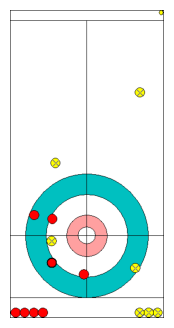

In [396]:
pImage = Image.open(fn)
print(np.array(pImage).shape)
ShowImage(pImage)

In [401]:
new_image = cv2.cvtColor(data, cv2.COLOR_RGB2BGR)
gray = cv2.cvtColor(new_image, cv2.COLOR_BGR2GRAY)
circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, dp=0.99, minDist=100, param1=128, param2=60, minRadius=60, maxRadius=0)
circles

array([[[149.5, 441.5, 118.9]]], dtype=float32)

1
isFlip False


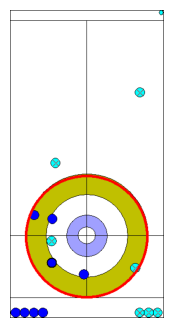

In [399]:
## 反転が必要か？

data = np.array(pImage)
new_image = cv2.cvtColor(data, cv2.COLOR_RGB2BGR)
gray = cv2.cvtColor(new_image, cv2.COLOR_BGR2GRAY)
circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, dp=0.99, minDist=100, param1=128, param2=60, minRadius=60, maxRadius=0)
print( len(circles))
assert( len(circles) > 0)
for circle in circles[0, :]:
    # 円周を描画する
    cen = (int(circle[0]),int(circle[1]))
    radius = int(circle[2])
    cv2.circle(new_image, center=cen, radius=radius, color=(255, 0, 0),thickness=4)
    # 中心点を描画する
    #cv2.circle(new_image, (circle[0], circle[1]), 2, (0, 0, 255), 3)
dest = data.shape[0]//2 > circles[0][0][1]
print('isFlip',dest)
ShowImage(new_image)

In [365]:
def IsFlip(data:np.ndarray):
    new_image = cv2.cvtColor(data, cv2.COLOR_RGB2BGR)
    gray = cv2.cvtColor(new_image, cv2.COLOR_BGR2GRAY)
    circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, dp=0.9, minDist=90, param1=128, param2=60, minRadius=60, maxRadius=0)
    ##print( len(circles))
    assert( len(circles) > 0)
    for circle in circles[0, :]:
        # 円周を描画する
        cen = (int(circle[0]),int(circle[1]))
        radius = int(circle[2])
        cv2.circle(new_image, center=cen, radius=radius, color=(255, 0, 0),thickness=4)
        # 中心点を描画する
        #cv2.circle(new_image, (circle[0], circle[1]), 2, (0, 0, 255), 3)
    dest = data.shape[0]//2 > circles[0][0][1]
    return dest

In [366]:
for fn in g:
    pImage = Image.open(fn)
    data = np.array(pImage)
    dest = IsFlip(data)
    print(fn,dest)
    numpy_image = data.copy()
    if dest == True:
        numpy_image = cv2.flip(numpy_image, -1)
    pil_image = Image.fromarray(numpy_image)
    bfn = os.path.basename(fn)+'.png'
    out_path = os.path.join( out_dir , bfn)
    pil_image.save(out_path)
    

./img\geme21end1.png True
./img\geme21end2.png False
./img\geme21end3.png True
./img\geme21end4.png False
./img\geme21end5.png True
./img\geme21end6.png False
./img\geme21end7.png True
./img\geme21end8.png False
./img\geme21end9.png True
./img\geme37end1.png True
./img\geme37end2.png False
./img\geme37end3.png True
./img\geme37end4.png False
./img\geme37end5.png True
./img\geme7end1.png True
./img\geme7end2.png False
./img\geme7end3.png True
./img\geme7end4.png False
./img\geme7end5.png True
./img\geme7end6.png False
./img\geme7end7.png True
./img\geme7end8.png False


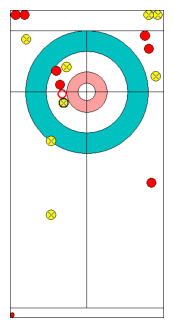

In [315]:
## 赤だけ抽出
#fn = './img\geme21end2.png'
#fn = './img\geme7end2.png'
fn = './img\geme37end5.png'

pImage = Image.open(fn)
ShowImage(pImage)

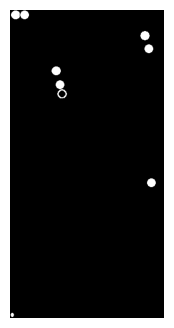

In [316]:
data = np.array(pImage)
new_img = cv2.cvtColor(data, cv2.COLOR_RGBA2BGR)
color = np.array([0,0,255])
new_img = cv2.inRange(new_img , color,color)
ShowGray(new_img)

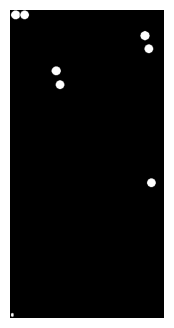

In [330]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
opening = cv2.morphologyEx(new_img, cv2.MORPH_OPEN, kernel )
ShowGray(opening)

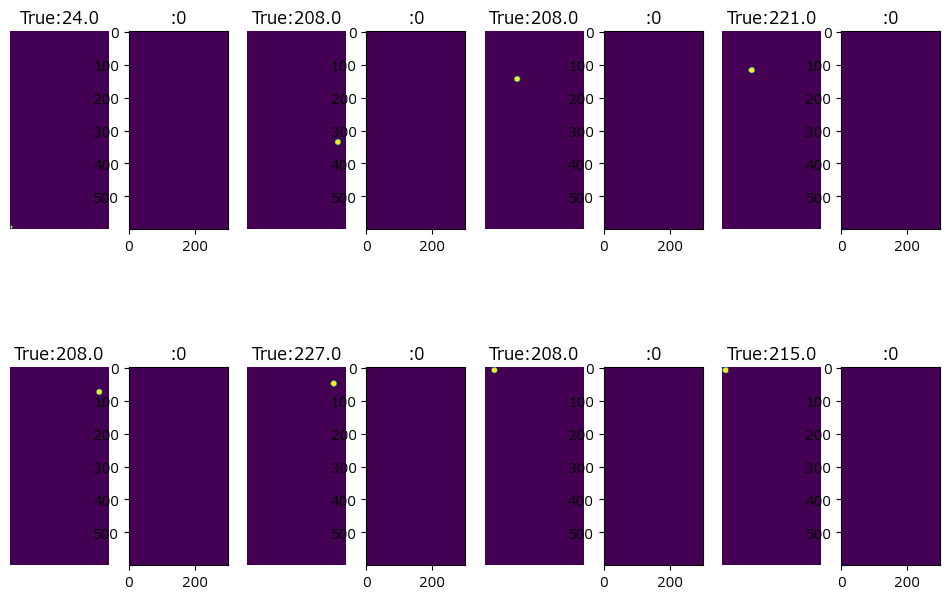

In [331]:
contours, hierarchy = cv2.findContours(opening,mode=cv2.RETR_CCOMP,method =cv2.CHAIN_APPROX_TC89_L1)
c = len(contours)
fig, axs = plt.subplots(2,c,figsize=(12,8))
axs = axs.flatten()
for i in range(c):
    ax = axs[i*2]
    cnt = contours[i]
    external_contours = np.zeros(new_img.shape)
    external_contours2 = np.zeros(new_img.shape)
    cv2.drawContours(external_contours, contours, i, 255, -1)
    ax.imshow(external_contours)

    #print( type(external_contours))
    circles = cv2.HoughCircles(external_contours.astype(np.uint8), cv2.HOUGH_GRADIENT, dp=0.99, minDist=20, param1=128, 
                               param2=10, minRadius=10, maxRadius=50)
    ##print( circles )
    n = 0
    if circles is not None:
        for circle in circles[0, :]:
            # 円周を描画する
            cen = (int(circle[0]),int(circle[1]))
            radius = int(circle[2])
            print(radius)
            cv2.circle(external_contours2, center=cen, radius=radius, color=(255, 0, 0),thickness=4)
            n = n + 1
    area = cv2.contourArea(contours[i])
    ax.set_title( f'{(hierarchy[0][i][3] == -1)}:{area}')
    ax.axis('off')

    ax = axs[i*2+1]
    ax.imshow(external_contours2)
    ax.set_title( f':{n}')
    

In [332]:
contours, hierarchy = cv2.findContours(new_img,mode=cv2.RETR_CCOMP,method =cv2.CHAIN_APPROX_TC89_L1)
hierarchy

array([[[ 1, -1, -1, -1],
        [ 2,  0, -1, -1],
        [ 4,  1,  3, -1],
        [-1, -1, -1,  2],
        [ 5,  2, -1, -1],
        [ 6,  4, -1, -1],
        [ 7,  5, -1, -1],
        [ 8,  6, -1, -1],
        [-1,  7, -1, -1]]], dtype=int32)

[1, 2, 3, 4, 5, 6, 7]

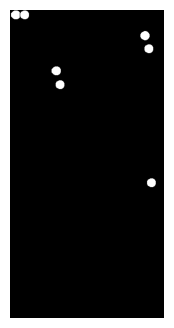

In [340]:
red_contours = []
index = []
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
opening = cv2.morphologyEx(new_img, cv2.MORPH_OPEN, kernel )
contours, hierarchy = cv2.findContours(opening,mode=cv2.RETR_CCOMP,method =cv2.CHAIN_APPROX_TC89_L1)
external_contours = np.zeros(opening.shape)
for i in range(len(contours)):
    ## -- トップレベル & 子を持たない + サイズが100以上
    if (hierarchy[0][i][3] == -1) & (hierarchy[0][i][2] == -1):
        cur = contours[i]
        area = cv2.contourArea(cur)
        if area > 100:
            cv2.drawContours(external_contours, contours, i, 255, -1)
            red_contours.append(contours[i])
            index.append(i)
        
    ## --　トップレベル & 子のサイズが10以上 + サイズが100以上
    if (hierarchy[0][i][3] == -1) & (hierarchy[0][i][2] != -1):
        cv2.drawContours(external_contours, contours, i, 127, -1)
        cur = contours[i]
        area = cv2.contourArea(cur)

        ch = hierarchy[0][i][2]
        ch_area = cv2.contourArea(contours[ch])
        print(area)
        if (area > 100) & (ch_area < 0.0001):
            cv2.drawContours(external_contours, contours, i, 127, -1)
            red_contours.append(contours[i])
            index.append(i)
            print(i)
            
        #red_contours.append(contours[i])
        
ShowGray(external_contours)
index
 

[-1 -1 -1  2]


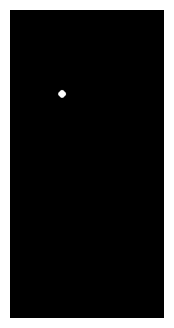

In [334]:
red_contours = []
external_contours = np.zeros(new_img.shape)
for i in range(len(contours)):
    ## -- 子供 
    if (hierarchy[0][i][3] != -1):
        cv2.drawContours(external_contours, contours, i, 255, -1)
        red_contours.append(red_contours)
        print( hierarchy[0][i] )
ShowGray(external_contours)

3 146.0


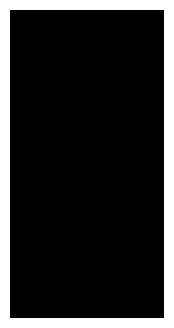

In [335]:
red_contours = []
external_contours = np.zeros(new_img.shape)
p = []
for i in range(len(contours)):
    ## -- 子供 
    if (hierarchy[0][i][3] != -1):
        area = cv2.contourArea(contours[i])
        print(i,area)
        p.append( hierarchy[0][i][3] )
for i in p[1:]:
    ## -- 子供の親
    cv2.drawContours(external_contours, contours, i, 255, -1)
    red_contours.append(contours[i])
    area = cv2.contourArea(contours[i])
    print( hierarchy[0][i] ,area )
ShowGray(external_contours)

208.0


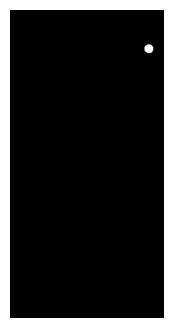

In [336]:
red_contours = []
external_contours = np.zeros(new_img.shape)

cv2.drawContours(external_contours, contours, 5, 127, -1)
area = cv2.contourArea(contours[5])
ShowGray(external_contours)
print(area)

In [215]:
hierarchy

array([[[ 1, -1, -1, -1],
        [ 2,  0, -1, -1],
        [ 3,  1, -1, -1],
        [ 4,  2, -1, -1],
        [ 5,  3, -1, -1],
        [ 6,  4, -1, -1],
        [ 7,  5, -1, -1],
        [ 8,  6, -1, -1],
        [ 9,  7, -1, -1],
        [-1,  8, -1, -1]]], dtype=int32)

In [341]:
## 赤石検出
def RedStoneDetect(data:np.ndarray):
    new_img = cv2.cvtColor(data, cv2.COLOR_RGBA2BGR)
    color = np.array([0,0,255])
    new_img = cv2.inRange(new_img , color,color)
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    opening = cv2.morphologyEx(new_img, cv2.MORPH_OPEN, kernel )
    contours, hierarchy = cv2.findContours(opening,mode=cv2.RETR_CCOMP,method =cv2.CHAIN_APPROX_TC89_L1)
    ##print(len(contours) == 8 )
    red_contours = []
    for i in range(len(contours)):
         ## -- トップレベル & 子を持たない  + サイズが100以上
        if (hierarchy[0][i][3] == -1) & (hierarchy[0][i][2] == -1):
            cur = contours[i]
            area = cv2.contourArea(cur)
            if area > 100:
                red_contours.append(contours[i])
        ## --　トップレベル & 子のサイズが0.001以上  + サイズが100以上
        if (hierarchy[0][i][3] == -1) & (hierarchy[0][i][2] != -1):
            cur = contours[i]
            area = cv2.contourArea(cur)
            ch = hierarchy[0][i][2]
            ch_area = cv2.contourArea(contours[ch])
            if (area > 100) & (ch_area < 0.001):
                print(i)
                red_contours.append(contours[i])
    return red_contours
    pass

In [342]:
for fn in g:
    pImage = Image.open(fn)
    data = np.array(pImage)
    dest = IsFlip(data)
    ##print(fn,dest)
    numpy_image = data.copy()
    if dest == True:
        numpy_image = cv2.flip(numpy_image, -1)
    contours = RedStoneDetect(numpy_image)

    img = cv2.cvtColor(data, cv2.COLOR_RGBA2BGR)
    external_contours = np.zeros(img.shape)
    for i in range(len(contours)): 
        cv2.drawContours(external_contours, contours, i, 255, -1)
    ##print(fn,len(z))
    
    pil_image = Image.fromarray(external_contours.astype(np.uint8))
    bfn = os.path.basename(fn)
    out_path = os.path.join( out_dir , bfn)
    pil_image.save(out_path)
    #print(out_path)
    

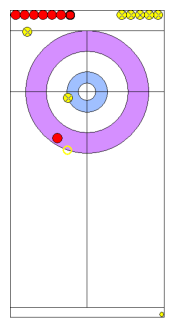

In [343]:
## 黄色だけ抽出
fn = './img\geme7end1.png'
pImage = Image.open(fn)
ShowImage(pImage)

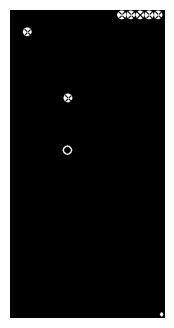

In [344]:
data = np.array(pImage)
new_img = cv2.cvtColor(data, cv2.COLOR_RGBA2BGR)
color = np.array([0,255,255])
new_img = cv2.inRange(new_img , color,color)
ShowGray(new_img)

In [345]:
contours, hierarchy = cv2.findContours(new_img,mode=cv2.RETR_CCOMP,method =cv2.CHAIN_APPROX_TC89_L1)
len(contours) 

23

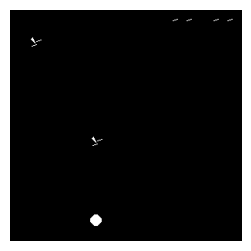

In [346]:
external_contours = np.zeros(new_img.shape)
for i in range(len(contours)):
    if (hierarchy[0][i][3] != -1) : ## 親を持つ
        cv2.drawContours(external_contours, contours, i, 255, -1)

def ShowGrayL(img):
    fig, ax = plt.subplots(figsize=(3,3))
    ax.imshow(img,cmap='gray')
    ax.set_ylim((300,0))
    ax.axis('off')
ShowGrayL(external_contours)
        

[-1 -1 -1  1]


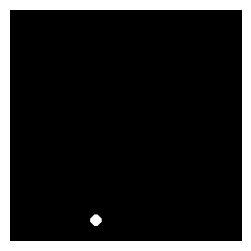

In [347]:
external_contours = np.zeros(new_img.shape)
for i in range(len(contours)):
    if (hierarchy[0][i][3] != -1) : ## 親を持つ　かつ面積20以上
        if  cv2.contourArea(contours[i]) > 10: ## 面積10以上
            cv2.drawContours(external_contours, contours, i, 255, -1)
            print(hierarchy[0][i])
def ShowGrayL(img):
    fig, ax = plt.subplots(figsize=(3,3))
    ax.imshow(img,cmap='gray')
    ax.set_ylim((300,0))
    ax.axis('off')
ShowGrayL(external_contours)

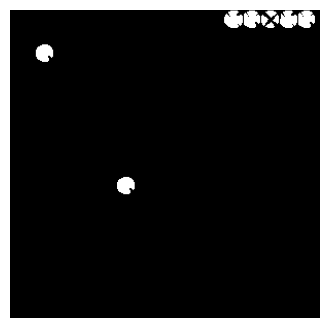

In [348]:
def yellowFilter( contours, hierarchy ):
    ignore_indexList = []
    for i in range(len(contours)):
        if (hierarchy[0][i][3] != -1) : ## 親を持つ　かつ面積20以上
            if  cv2.contourArea(contours[i]) > 10: ## 面積10以上
                ignore_indexList.append(hierarchy[0][i][3])
    return ignore_indexList

ignore  = yellowFilter( contours, hierarchy )

external_contours = np.zeros(new_img.shape)
for i in range(len(contours)):
     ## トップ
    if (hierarchy[0][i][3] == -1) & (i not in ignore):
        cv2.drawContours(external_contours, contours, i, 255, -1)

def ShowGrayL(img):
    fig, ax = plt.subplots(figsize=(4,4))
    ax.imshow(img,cmap='gray')
    ax.set_ylim((300,0))
    ax.axis('off')
ShowGrayL(external_contours)

In [349]:
## 黄石検出
def YellowStoneDetect(data:np.ndarray):
    new_img = cv2.cvtColor(data, cv2.COLOR_RGBA2BGR)
    color = np.array([0,255,255])
    new_img = cv2.inRange(new_img , color,color)
    contours, hierarchy = cv2.findContours(new_img,mode=cv2.RETR_CCOMP,method =cv2.CHAIN_APPROX_TC89_L1)

    def yellowFilter( contours, hierarchy ):
        ignore_indexList = []
        for i in range(len(contours)):
            if (hierarchy[0][i][3] != -1) : ## 親を持つ　かつ面積20以上
                if  cv2.contourArea(contours[i]) > 10: ## 面積10以上
                    ignore_indexList.append(hierarchy[0][i][3])
        return ignore_indexList
    
    ignore  = yellowFilter( contours, hierarchy )

    yellow_contours = []
    for i in range(len(contours)):
         ## トップ
        if (hierarchy[0][i][3] == -1) & (i not in ignore):
            yellow_contours.append(contours[i])
    
    return yellow_contours
    

In [350]:
for fn in g:
    pImage = Image.open(fn)
    data = np.array(pImage)
    dest = IsFlip(data)
    ##print(fn,dest)
    numpy_image = data.copy()
    if dest == True:
        numpy_image = cv2.flip(numpy_image, -1)
    contours = YellowStoneDetect(numpy_image)

    img = cv2.cvtColor(data, cv2.COLOR_RGBA2BGR)
    external_contours = np.zeros(img.shape)
    for i in range(len(contours)): 
        cv2.drawContours(external_contours, contours, i, 255, -1)
    ##print(fn,len(z))
    
    pil_image = Image.fromarray(external_contours.astype(np.uint8))
    bfn = os.path.basename(fn)+'.png'
    out_path = os.path.join( out_dir , bfn)
    pil_image.save(out_path)
    print(out_path)

outimg\geme21end1.png.png
outimg\geme21end2.png.png
outimg\geme21end3.png.png
outimg\geme21end4.png.png
outimg\geme21end5.png.png
outimg\geme21end6.png.png
outimg\geme21end7.png.png
outimg\geme21end8.png.png
outimg\geme21end9.png.png
outimg\geme37end1.png.png
outimg\geme37end2.png.png
outimg\geme37end3.png.png
outimg\geme37end4.png.png
outimg\geme37end5.png.png
outimg\geme7end1.png.png
outimg\geme7end2.png.png
outimg\geme7end3.png.png
outimg\geme7end4.png.png
outimg\geme7end5.png.png
outimg\geme7end6.png.png
outimg\geme7end7.png.png
outimg\geme7end8.png.png


有効ストーンのみを下敷きに投射する

In [351]:
for fn in g:
    pImage = Image.open(fn)

    ##------------------------
    data = np.array(pImage)
    dest = IsFlip(data)
    ##print(fn,dest)
    numpy_image = data.copy()
    if dest == True:
        numpy_image = cv2.flip(numpy_image, -1)
    y_cvontours = YellowStoneDetect(numpy_image)
    r_cvontours = RedStoneDetect(numpy_image)
    ##------------------------
    outImage = Image.open(baseimage_fn)
    outdata = np.array(outImage)
    dest_img = cv2.cvtColor(outdata, cv2.COLOR_RGBA2BGR)
    cv2.drawContours(dest_img, r_cvontours, -1,  (0, 0, 255), -1)
    cv2.drawContours(dest_img, y_cvontours, -1,  (0, 255, 255), -1)
    dest_img = cv2.cvtColor(dest_img, cv2.COLOR_BGR2RGB)
    dest_img = dest_img[20:560,:,:] ## clip
    ##------------------------
    pil_image = Image.fromarray(dest_img.astype(np.uint8))
    bfn = os.path.basename(fn)
    out_path = os.path.join( out_dir , bfn)
    pil_image.save(out_path)
    

## 清書すると

In [352]:
def IsFlip(data:np.ndarray):
    gray = cv2.cvtColor(new_image, cv2.COLOR_BGR2GRAY)
    circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, dp=0.9, minDist=90, param1=128, param2=60, minRadius=60, maxRadius=0)
    ##print( len(circles))
    assert( len(circles) > 0)
    dest = data.shape[0]//2 > circles[0][0][1]
    return dest
## 赤石検出
def RedStoneDetect(data:np.ndarray):
    new_img = cv2.cvtColor(data, cv2.COLOR_RGBA2BGR)
    color = np.array([0,0,255])
    new_img = cv2.inRange(new_img , color,color)
    
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    opening = cv2.morphologyEx(new_img, cv2.MORPH_OPEN, kernel )
    contours, hierarchy = cv2.findContours(opening,mode=cv2.RETR_CCOMP,method =cv2.CHAIN_APPROX_TC89_L1)

    ##print(len(contours) == 8 )
    red_contours = []
    for i in range(len(contours)):
         ## -- トップレベル & 子を持たない
        if (hierarchy[0][i][3] == -1) & (hierarchy[0][i][2] == -1):
            red_contours.append(contours[i])

    return red_contours
    pass
## 黄石検出
def YellowStoneDetect(data:np.ndarray):
    new_img = cv2.cvtColor(data, cv2.COLOR_RGBA2BGR)
    color = np.array([0,255,255])
    new_img = cv2.inRange(new_img , color,color)
    contours, hierarchy = cv2.findContours(new_img,mode=cv2.RETR_CCOMP,method =cv2.CHAIN_APPROX_TC89_L1)

    def yellowFilter( contours, hierarchy ):
        ignore_indexList = []
        for i in range(len(contours)):
            if (hierarchy[0][i][3] != -1) : ## 親を持つ　かつ面積20以上
                if  cv2.contourArea(contours[i]) > 10: ## 面積10以上
                    ignore_indexList.append(hierarchy[0][i][3])
        return ignore_indexList
    
    ignore  = yellowFilter( contours, hierarchy )

    yellow_contours = []
    for i in range(len(contours)):
         ## トップ
        if (hierarchy[0][i][3] == -1) & (i not in ignore):
            yellow_contours.append(contours[i])
    
    return yellow_contours
    pass

In [368]:
%%time
g = glob.glob(os.path.join(image_src , '*.png'))
for fn in g:
    pImage = Image.open(fn)

    ##------------------------
    data = np.array(pImage)
    dest = IsFlip(data)
    ##print(fn,dest)
    numpy_image = data.copy()
    if dest == True:
        print('flip')
        numpy_image = cv2.flip(numpy_image, -1)
    y_cvontours = YellowStoneDetect(numpy_image)
    r_cvontours = RedStoneDetect(numpy_image)
    ##------------------------
    outImage = Image.open(baseimage_fn)
    outdata = np.array(outImage)
    dest_img = cv2.cvtColor(outdata, cv2.COLOR_RGBA2BGR)
    cv2.drawContours(dest_img, r_cvontours, -1,  (0, 0, 255), -1)
    cv2.drawContours(dest_img, y_cvontours, -1,  (0, 255, 255), -1)
    dest_img = cv2.cvtColor(dest_img, cv2.COLOR_BGR2RGB)
    dest_img = dest_img[20:560,:,:] ## clip
    ##------------------------
    pil_image = Image.fromarray(dest_img.astype(np.uint8))
    bfn = os.path.basename(fn)
    out_path = os.path.join( out_dir , bfn)
    pil_image.save(out_path)

flip
flip
flip
flip
flip
flip
flip
flip
flip
flip
flip
flip
CPU times: total: 938 ms
Wall time: 571 ms
